# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [53]:
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import csv
import datetime as dt
from pprint import pprint


# Import API key
from config2 import weather_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [54]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to an our cities list
    if city not in cities:
        cities.append(city)
       

In [55]:
# Print the city count to confirm sufficient count
len(cities)

590

In [56]:
city_list = pd.DataFrame ({'City': cities})
city_list.head()

,City
0,talnakh
1,mataura
2,rikitea
3,vaini
4,maldonado


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [57]:
# api info

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

#build query

query_url = f"{url}appid={weather_key}&units={units}&q="

In [58]:
#build lists for holding data

city_name=[]
cloudiness = []
country = []
date= []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

#create counter for city #
count = 1

#create print log
print(f'Beginning Data Retrieval')
print('-' * 50)

#loop through cities for requests(use try/except prevent error out)

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        max_temp.append(response['main']['temp_max'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        wind_speed.append(response['wind']['speed'])
        
        print(f'Processing Record {count} | {city}')
        
        count += 1
        
    except:
        print(f' Unable to process city')


Beginning Data Retrieval
--------------------------------------------------
Processing Record 1 | talnakh
Processing Record 2 | mataura
Processing Record 3 | rikitea
Processing Record 4 | vaini
Processing Record 5 | maldonado
Processing Record 6 | tuatapere
Processing Record 7 | omboue
Processing Record 8 | brae
Processing Record 9 | thompson
Processing Record 10 | dunedin
Processing Record 11 | bouna
 Unable to process city
 Unable to process city
Processing Record 12 | new norfolk
Processing Record 13 | saint-augustin
Processing Record 14 | chokurdakh
Processing Record 15 | ushuaia
Processing Record 16 | jibuti
Processing Record 17 | albany
Processing Record 18 | georgetown
Processing Record 19 | saint-philippe
Processing Record 20 | marawi
Processing Record 21 | cesis
Processing Record 22 | arraial do cabo
Processing Record 23 | punta arenas
Processing Record 24 | palu
Processing Record 25 | busselton
Processing Record 26 | magaria
Processing Record 27 | avarua
Processing Record 28 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [59]:
# create dict

weather_dict = {
    'City' : city_name, 
    'Cloudiness': cloudiness, 
    'Country': country,
    'Datetime': date, 
    'Humidity' : humidity, 
    'Lat': lat,
    'Long' : lng,
    'Max Temp' : max_temp, 
    'Wind Speed' : wind_speed
    
}

# create df

weather_data = pd.DataFrame (weather_dict)


In [60]:
weather_data.head()

,City,Cloudiness,Country,Datetime,Humidity,Lat,Long,Max Temp,Wind Speed
0,Talnakh,97,RU,1624416734,66,69.4865,88.3972,46.17,12.26
1,Mataura,100,NZ,1624416700,87,-46.1927,168.8643,50.49,2.39
2,Rikitea,24,PF,1624416655,75,-23.1203,-134.9692,75.90,9.84
3,Vaini,75,TO,1624416659,88,-21.2000,-175.2000,75.36,5.75
4,Departamento de Maldonado,0,UY,1624416717,93,-34.6667,-54.9167,52.99,8.97


In [61]:
#save df to csv

weather_data.to_csv('weather_data.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [62]:
weather_data['Humidity'].unique()

array([ 66,  87,  75,  88,  93,  76,  85,  86,  42,  57,  97,  99,  22,
        56,  44,  77,  79,  95,  53,  71,  59,  65,  84,  60,  46,  74,
        89,  82,  92,  80,  51,  94,  20,  73,  70,  29,  64,  72,  54,
        28,  91,  62,  83,  90,  69,  78,  61,  63,  11,  30,  40,  96,
        68,  33,  45,  81,  67,  41,  35, 100,  52,  39,  38,  21,  48,
        37,  15,  32,  50,  16,  26,  12,  23,  98,  58,  55,  47,  43,
        34,   9,  49,  17,  31,  14,  24])

In [63]:
#  Get the indices of cities that have humidity over 100%.
#no cities > 100

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

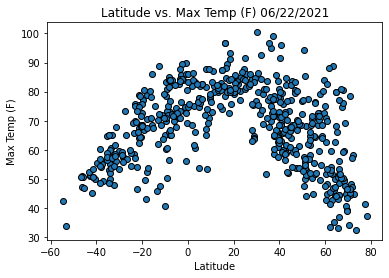

In [64]:
#today's date
date = dt.date.today().strftime("%m/%d/%Y")

plt.scatter(weather_data['Lat'], weather_data['Max Temp'], marker= 'o', alpha = 1, edgecolors='k')
plt.ylabel( 'Max Temp (F)')
plt.xlabel( 'Latitude')
plt.title(f'Latitude vs. Max Temp (F) {date}')


plt.savefig("Latitude_vs_Max_Temp.png")
plt.show()

In [65]:
# This is analyzing the correlation between temp and latitude. 
#As expected, the temperature generally increases as you approach the Equator (latitude approaches 0).  

## Latitude vs. Humidity Plot

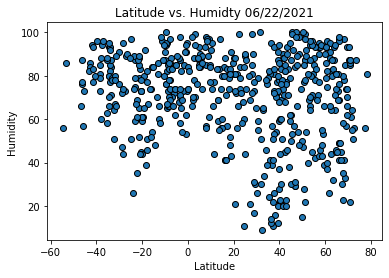

In [66]:
plt.scatter(weather_data['Lat'], weather_data['Humidity'], marker = 'o', alpha =1, edgecolors = 'k')
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.title(f'Latitude vs. Humidty {date}')


plt.savefig("Lat_vs_Humidity.png")
plt.show()

In [67]:
# This is analyzing the correlation between latitude and humidity. 
# There does not appear to be a strong correlation between latitude and humidity. 

## Latitude vs. Cloudiness Plot

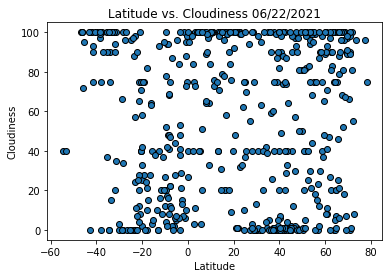

In [68]:
plt.scatter(weather_data['Lat'], weather_data['Cloudiness'], marker='o', alpha =1, edgecolors = 'k')
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.title(f'Latitude vs. Cloudiness {date}')


plt.savefig("Lat_vs_cloud.png")
plt.show()


In [69]:
# This is analyzing the correlation between latitude and cloudiness. 
# There does not appear to be a strong correlation between cloud cover and latitude. 

## Latitude vs. Wind Speed Plot

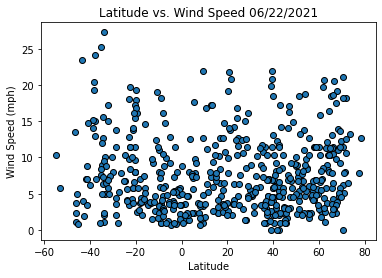

In [70]:
plt.scatter(weather_data['Lat'], weather_data['Wind Speed'], marker='o', alpha=1, edgecolors='k')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.title(f'Latitude vs. Wind Speed {date}')

plt.savefig("Lat_vs_Windspeed.png")
plt.show()

In [71]:
# This is analyzing the correlation between latitude and wind speed (mph). 
# There does not appear to be a strong correlation between wind speed and latitude. 

## Linear Regression

In [72]:
northern = weather_data.loc[weather_data["Lat"] >= 0.0]
northern.reset_index(inplace=True)

southern = weather_data.loc[weather_data["Lat"] < 0.0]
southern.reset_index(inplace=True)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.6330451645413
The equation of the regression line is: y = -0.45x + 87.0


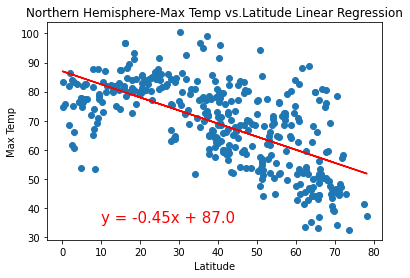

In [73]:
x = northern['Lat']
y = northern['Max Temp']



(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept

line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(10,35),fontsize=15,color="red")
plt.title("Northern Hemisphere-Max Temp vs.Latitude Linear Regression")
plt.ylabel('Max Temp')
plt.xlabel('Latitude')

print(f"The r-squared is: {rvalue}")
print(f"The equation of the regression line is: {line_eq}")


plt.savefig("Lat_vs_tempnh.png")
plt.show()

In [ ]:
# There is a negative correlation between temp and latitude for the northern hemisphere. 
# As you increase in latitude, the temp is more likely to decrease. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7254007478240588
The equation of the regression line is: y = 0.65x + 78.94


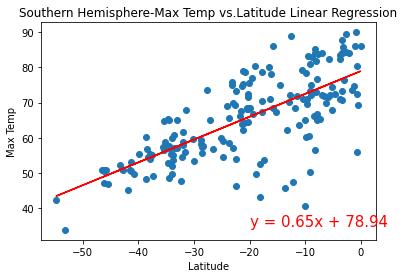

In [74]:
x = southern['Lat']
y = southern['Max Temp']



(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept

line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-20,35),fontsize=15,color="red")
plt.title("Southern Hemisphere-Max Temp vs.Latitude Linear Regression")
plt.ylabel('Max Temp')
plt.xlabel('Latitude')

print(f"The r-squared is: {rvalue}")
print(f"The equation of the regression line is: {line_eq}")

plt.savefig("Lat_vs_tempsh.png")
plt.show()

In [ ]:
# There is a positive correlation between temp and latitude for the southern hemisphere. 
# As you increase in latitude, the temp is likely to also increase. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.09620622402932348
The equation of the regression line is: y = -0.11x + 73.0


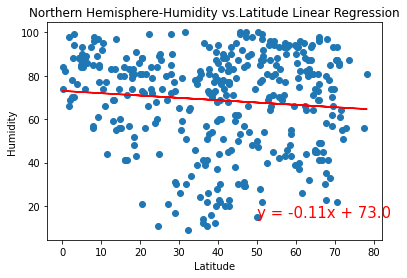

In [75]:
x = northern['Lat']
y = northern['Humidity']



(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept

line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(50,15),fontsize=15,color="red")
plt.title("Northern Hemisphere-Humidity vs.Latitude Linear Regression")
plt.ylabel('Humidity')
plt.xlabel('Latitude')

print(f"The r-squared is: {rvalue}")
print(f"The equation of the regression line is: {line_eq}")

plt.savefig("Lat_vs_hum_nh.png")
plt.show()

In [ ]:
# The correlation between humidity and latitude appears to be slightly negative and very weak. 
# There does not appear to be a significant on humidty based on latitude in the northern hemisphere. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.025912513008985383
The equation of the regression line is: y = -0.03x + 74.9


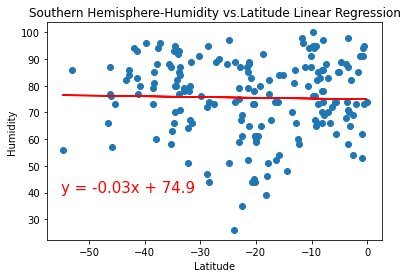

In [76]:
x = southern['Lat']
y = southern['Humidity']



(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept

line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-55,40),fontsize=15,color="red")
plt.title("Southern Hemisphere-Humidity vs.Latitude Linear Regression")
plt.ylabel('Humidity')
plt.xlabel('Latitude')

print(f"The r-squared is: {rvalue}")
print(f"The equation of the regression line is: {line_eq}")

plt.savefig("Lat_vs_hum_sh.png")
plt.show()

In [44]:
# The correlation between humidity and lat in the southern hemisphere is slightly positive and very weak. 
# There does not appear to be a significant impact on humidity based on latitude in the southern hemisphere. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.062299173175560614
The equation of the regression line is: y = -0.12x + 61.86


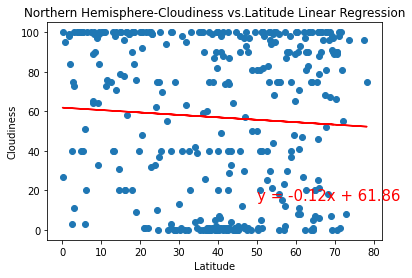

In [77]:
x = northern['Lat']
y = northern['Cloudiness']



(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept

line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(50,15),fontsize=15,color="red")
plt.title("Northern Hemisphere-Cloudiness vs.Latitude Linear Regression")
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')

print(f"The r-squared is: {rvalue}")
print(f"The equation of the regression line is: {line_eq}")

plt.savefig("Lat_vs_cloud_nh.png")
plt.show()

In [46]:
# The corrlation between latitdue and cloudiness in the northern hemisphere is slightly negative and fairly weak. 
# The impact of latitidue on cloudiness appears to be insignificant in the northern hemisphere. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.383352176245628
The equation of the regression line is: y = -1.1x + 28.24


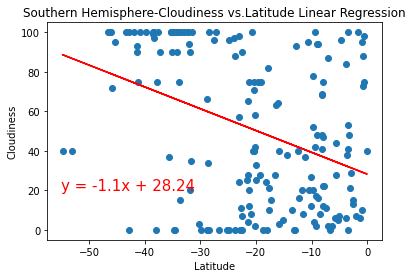

In [78]:
x = southern['Lat']
y = southern['Cloudiness']



(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept

line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
plt.title("Southern Hemisphere-Cloudiness vs.Latitude Linear Regression")
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')

print(f"The r-squared is: {rvalue}")
print(f"The equation of the regression line is: {line_eq}")

plt.savefig("Lat_vs_cloud_sh.png")
plt.show()

In [ ]:
# The correlation between cloudiness and latitude is negative and stronger in the southern hemisphere than it
# was in the northern hemisphere.  

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.13869903925142743
The equation of the regression line is: y = 0.03x + 6.12


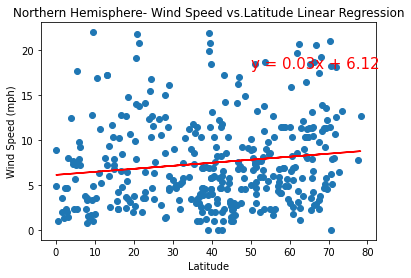

In [79]:
x = northern['Lat']
y = northern['Wind Speed']



(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept

line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(50,18),fontsize=15,color="red")
plt.title("Northern Hemisphere- Wind Speed vs.Latitude Linear Regression")
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')

print(f"The r-squared is: {rvalue}")
print(f"The equation of the regression line is: {line_eq}")

plt.savefig("Lat_vs_ws_nh.png")
plt.show()

In [ ]:
# The correlation between wind speed and latitude in the northern hemispher is extremely weak and positive. 
# Latitude appears to have no impact on wind speed in the northern hemisphere. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.27012697891697757
The equation of the regression line is: y = -0.11x + 5.41


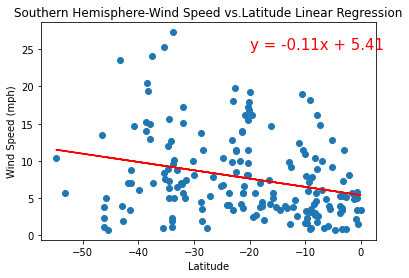

In [80]:
x = southern['Lat']
y = southern['Wind Speed']



(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept

line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-20,25),fontsize=15,color="red")
plt.title("Southern Hemisphere-Wind Speed vs.Latitude Linear Regression")
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')

print(f"The r-squared is: {rvalue}")
print(f"The equation of the regression line is: {line_eq}")

plt.savefig("Lat_vs_ws_sh.png")
plt.show()

In [ ]:
# The correlation between wind speed and latitude is slightly stronger in the southern hemisphere than the northern, 
# but it is negative in the southern hemisphere which is opposite of the correlation between the two variable in the 
# northern hemisphere. 